In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("N_A_analysis_3.csv")

In [30]:
df["R_P_difference"] = df["Num_R_peaks"] - df["Num_P_peaks"]
df.head()

,Unnamed: 0,File_name,Num_R_peaks,Num_P_peaks,distribution_score,label,R_P_difference
0,0,train_ecg_00001,27,27,0.923077,N,0
1,1,train_ecg_00002,31,30,0.833333,N,1
2,2,train_ecg_00004,30,29,0.931034,N,1
3,3,train_ecg_00006,36,35,0.742857,N,1
4,4,train_ecg_00007,16,16,0.800000,N,0


In [77]:
df_train = df.iloc[0:800]
df_test = df.iloc[800:]

In [93]:
N_df = df_train[df_train["label"] == 'N']
A_df = df_train[df_train["label"] == 'A']

In [94]:
N_mean_R_P_diff = N_df["R_P_difference"].mean()
A_mean_R_P_diff = A_df["R_P_difference"].mean()
print(N_mean_R_P_diff)
print(A_mean_R_P_diff)

1.8115942028985508
11.863636363636363


In [95]:
N_mean_dist_score = N_df["distribution_score"].mean()
A_mean_dist_score = A_df["distribution_score"].mean()
print(N_mean_dist_score)
print(A_mean_dist_score)

0.8832436411667433
0.5673602079959135


(array([87., 16.,  3.,  2.,  2.]),
 array([ 0. , 18.2, 36.4, 54.6, 72.8, 91. ]),
 <a list of 5 Patch objects>)

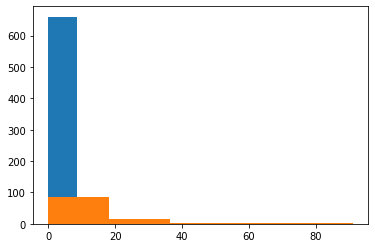

In [96]:
plt.hist(N_df["R_P_difference"], bins = 5)
plt.hist(A_df["R_P_difference"], bins = 5)


(array([ 3.,  2., 10., 12., 20., 18., 12., 13., 11.,  9.]),
 array([0.02439024, 0.12195122, 0.2195122 , 0.31707317, 0.41463415,
        0.51219512, 0.6097561 , 0.70731707, 0.80487805, 0.90243902,
        1.        ]),
 <a list of 10 Patch objects>)

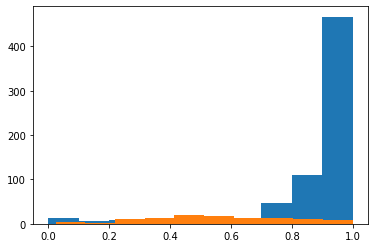

In [97]:
plt.hist(N_df["distribution_score"], bins = 10)
plt.hist(A_df["distribution_score"], bins = 10)

In [105]:
from sklearn import tree

features = np.array(df_train[["R_P_difference", "distribution_score"]])
target = np.array(df_train["label"])
X, y = features, target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)


In [106]:
test_data = np.array(df_test[["R_P_difference", "distribution_score"]])
test_labels = np.array(df_test["label"])

In [107]:
pred = clf.predict(test_data)

In [108]:
df_result = pd.DataFrame(columns = ['True_labels', 'Prediction'])
df_result['True_labels'] = test_labels 
df_result['Prediction'] = pred 
conditions = [df_result['True_labels'] == df_result['Prediction']]

#define choices
choices = [1]

#create new column in DataFrame that displays results of comparisons
df_result['correct'] = np.select(conditions, choices, default=0)


In [109]:
df_result

,True_labels,Prediction,correct
0,N,N,1
1,N,N,1
2,N,N,1
3,N,N,1
4,N,N,1
...,...,...,...
208,N,N,1
209,A,N,0
210,N,N,1
211,N,N,1


In [110]:
N_true_label = df_result[df_result["True_labels"] == 'N']
A_true_label = df_result[df_result["True_labels"] == 'A']

N_correct = N_true_label[N_true_label['correct'] == 1]
A_correct = A_true_label[A_true_label['correct'] == 1]

F1_macro_score_N = len(N_correct)/ len(N_true_label)
F1_macro_score_A = len(A_correct)/ len(A_true_label)

overall_accuracy = (len(N_correct) + len(A_correct))/ len(df_result)

In [111]:
print('overall_accuracy:', overall_accuracy) 
print('F1_macro_score_N: ', F1_macro_score_N) 
print('F1_macro_score_A: ', F1_macro_score_A) 

overall_accuracy: 0.8544600938967136
F1_macro_score_N:  0.9101123595505618
F1_macro_score_A:  0.5714285714285714
